<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
# to perform algebraic calculation
import numpy as np

# to operate the datasets and dataframes
import pandas as pd   
 
# for kmeans clustering
from sklearn.cluster import KMeans   

# to convert data into standard form
from sklearn.preprocessing import StandardScaler 

# to visualize data
import seaborn as sns 

# to plot graphs
import matplotlib.pyplot as plt  
import matplotlib.cm as cm

# to calculate silhouette_score
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples

# filter the warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the csv file and print the first five observations.

In [2]:
# read dataset
df_earthquake = pd.read_csv('Earthquake_Data.csv')

# print first five rows of data set
df_earthquake.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# to know the dimension of the data 
print(df_earthquake.shape)  

(1647, 4)


**Interpretation:** There are 1647 observations and 4 variables in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# to know the data type of each variable use 'dtypes'
print(df_earthquake.dtypes)   

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object


**Interpretation:** The above output shows that all the variables are numerical.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
df_earthquake.isnull().sum() 

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

**Interpretation:**  There is no missing value in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# describe() is used to get the summary statistic of each numerical variable
df_earthquake.describe()   

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


**Interpretation:**  The above summary returns the statistical insights about the data. All the recorded earthquakes have a magnitude between 0.2 and 5.2 with an average of 2.38. On average the depth is 7559.7 meters. The latitude and longitude values correspond to the various parts of the USA.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

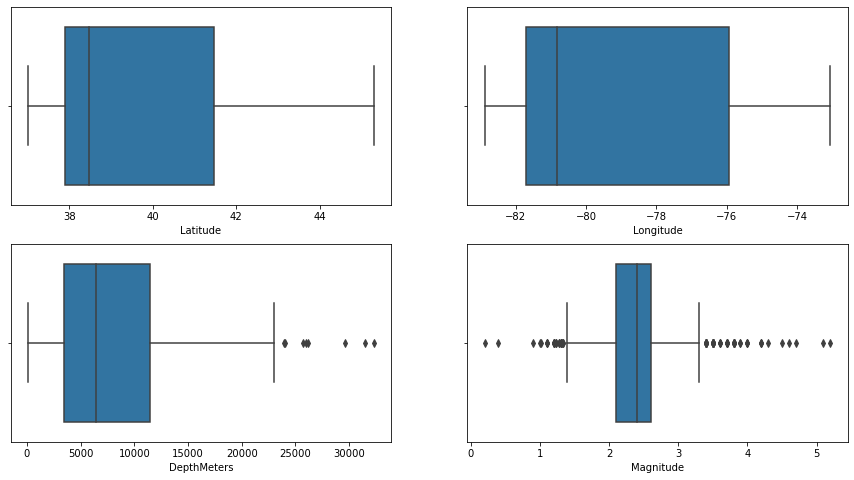

In [7]:
# fix the size, number of rows, number of columns of subplot.
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_earthquake.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_earthquake[variable], ax = subplot)

# display the plot
plt.show()

**Interpretation:** 
i) From the above boxplot of longitude and latitude, we can see that the distribution of latitude and longitude is positively skewed and there are no outliers.

ii) Here the distribution of depth in meters is positively skewed and there are outliers approximately above the 22000 meters.

iii) The variable magnitude is roughly symmetrically distributed. We can see that there are many outliers in this variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# calculate the first quartile
Q1 = df_earthquake.quantile(0.25)

# calculate the third quartile
Q3 = df_earthquake.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_earthquake = df_earthquake[~((df_earthquake < (Q1 - 1.5 * IQR)) | (df_earthquake > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# check the shape of the data
df_earthquake.shape

(1562, 4)

**Interpretation:** We have removed the outliers. Now there are 1562 observations and 4 variables in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# pass the list of variables to the drop()
# 'axis = 1' drops the specified column
df_feat = df_earthquake.drop(["Latitude", "Longitude"], axis = 1)

# check the first five observations
df_feat.head()

,DepthMeters,Magnitude
0,5000,2.8
1,11500,2.8
2,18000,2.1
3,5000,2.4
5,2300,2.4


**Interpretation:** Now there are only two variables in the data which we use to cluster the observations.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# use 'StandardScaler' to transform data into standard form
# store the transformed data in the variable 'scaled_features' 
scaled_features= StandardScaler().fit_transform(df_feat)

# to print 'scaled_features'
scaled_features

array([[-0.48890768,  1.25239414],
       [ 0.80353035,  1.25239414],
       [ 2.09596838, -0.73501951],
       ...,
       [-0.86669725, -0.73501951],
       [ 1.89713176, -0.45110327],
       [ 2.27492133, -0.45110327]])

In [12]:
# convert the array to a dataframe
# pass the required column names to the parameter 'columns'
summary = pd.DataFrame(scaled_features, columns = df_feat.columns)

# print the summary statistics
# use 'round()' to round-off the values to integers
round(summary.describe())

,DepthMeters,Magnitude
count,1562.0,1562.0
mean,0.0,0.0
std,1.0,1.0
min,-1.0,-3.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,3.0,3.0


**Interpretation:** Here all the variables have mean 0 and standard deviation 1. Thus, now they are in the standard form.

<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# Consider the number of clusters (K) from 1 to 7
# use for loop to perform K-means with different values of K
# consider an empty list to store the WCSS
wcss = []

# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(1,8):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
print(wcss)

[3123.999999999996, 1943.6180289051451, 1257.9804349427545, 964.3320453433413, 791.8852642579334, 672.98197616187, 587.1154576959428]


**Interpretation:** The above output shows the within cluster sum of squares (WCSS) for different values of K. We can see that the WCSS is decreasing with the increase in K.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

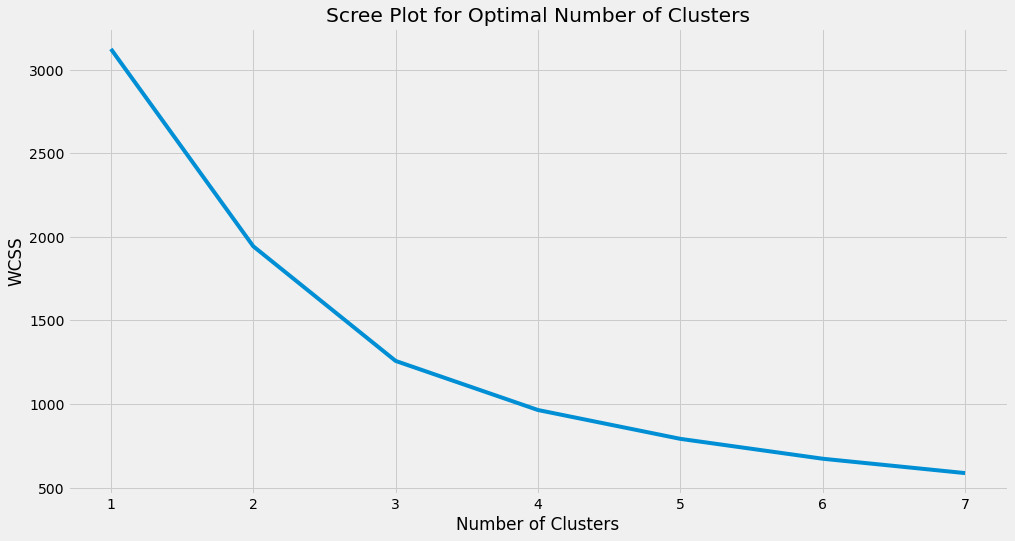

In [14]:
# visualize the elbow plot to get the optimal value of K

# set the plot style 
plt.style.use("fivethirtyeight")

# set the plot size using 'figsize'
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,8), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")

# display the plot
plt.show()

**Interpretation:** The optimal number of clusters is K = 3. The WCSS is decreasing slowly after K = 3.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# consider an empty list to store the silhouette
silhouette_coefficients = []

# use 'for' loop to build the clusters
# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(2,8):
    
    # perform K-means with different K values
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(scaled_features)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(scaled_features,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)
    
# print the silhouette coefficients
print(silhouette_coefficients)

[0.3743329052107901, 0.39268003903375004, 0.3675083071920705, 0.34491205145272075, 0.3458336784043734, 0.3419253303385232]


**Interpretation:** The above output returns the silhouette coefficient for each value of K between 2 and 7.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

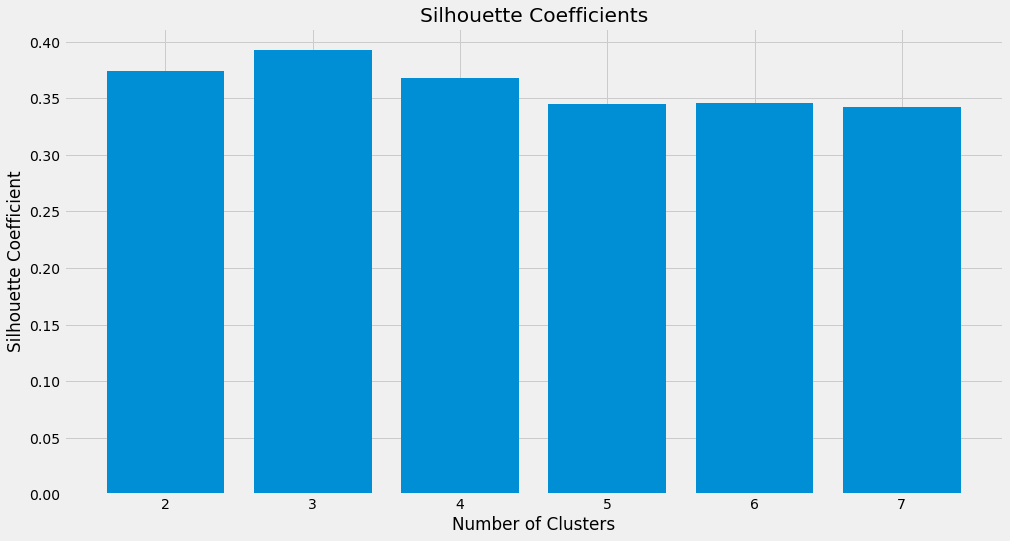

In [16]:
# to select style of histogram
plt.style.use("fivethirtyeight")

# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot bar plot of silhouette coefficients
# last number in the range() is exclusive
plt.bar(range(2,8), silhouette_coefficients)

# add axes and plot labels
plt.title('Silhouette Coefficients')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

# display the bar plot
plt.show()

**Interpretation:** From the above bar plot of the silhouette coefficients, we can see that the silhouette coefficient is maximum for k=3.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

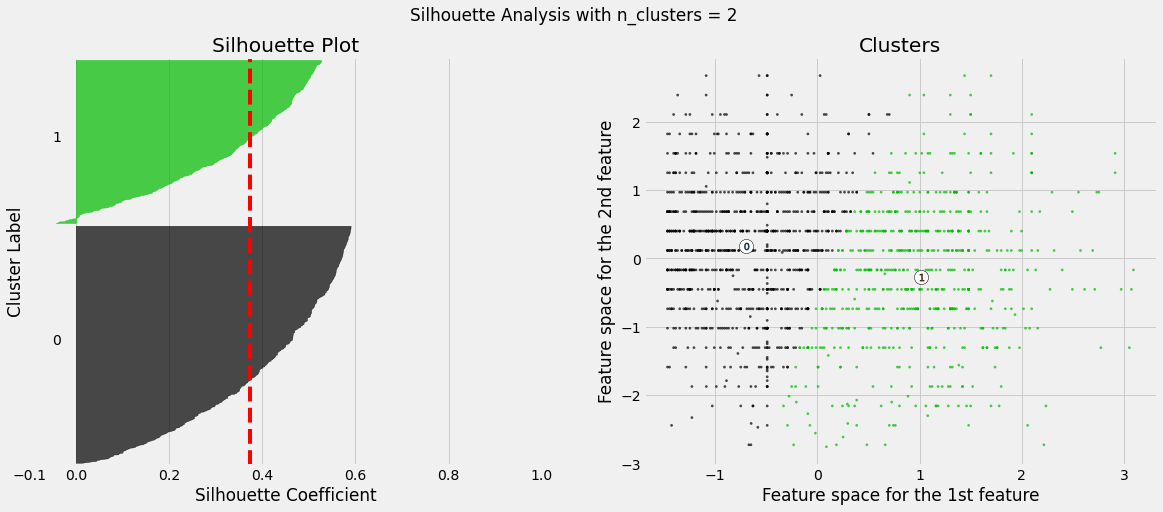

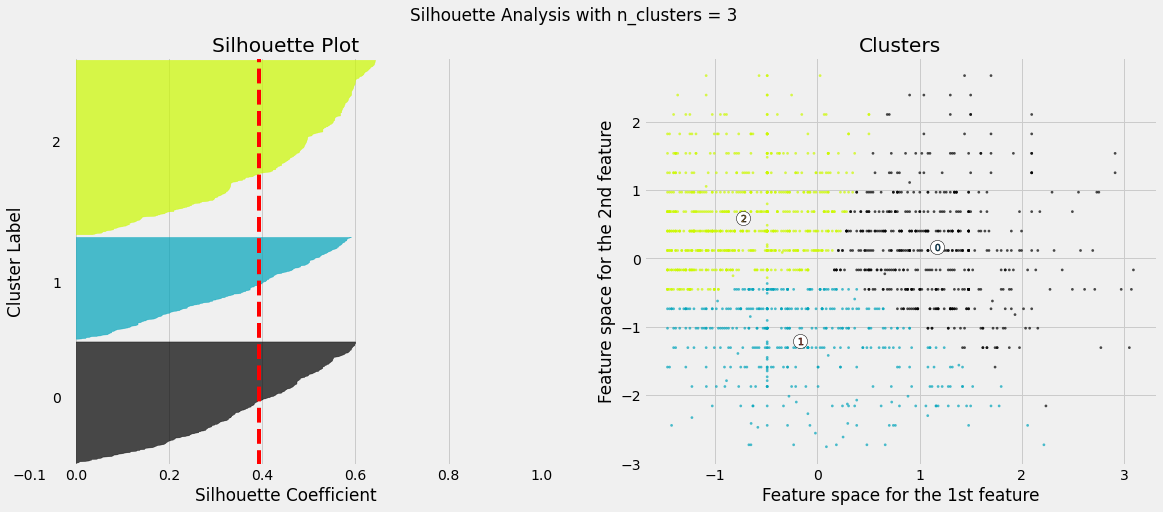

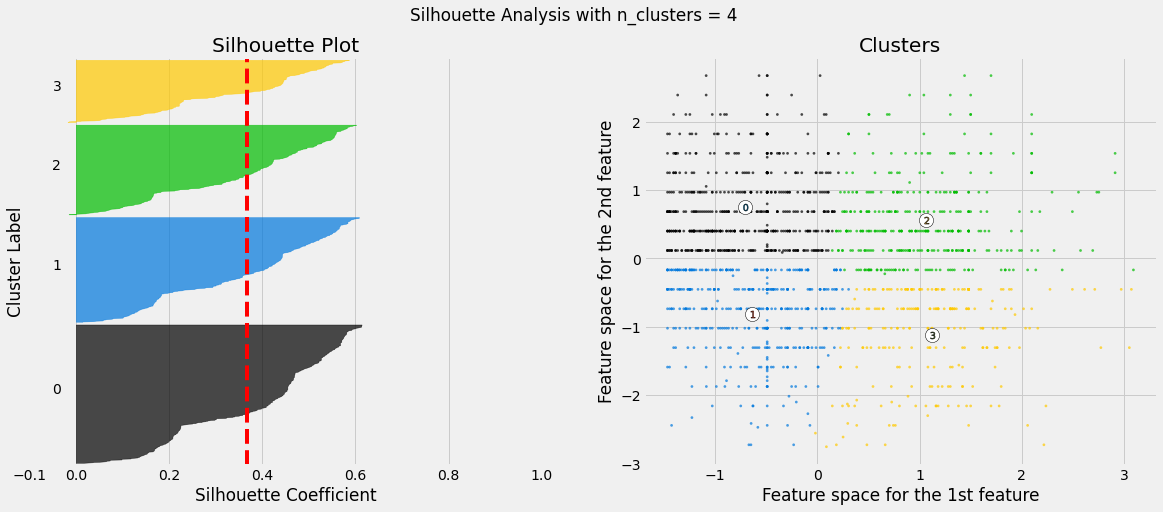

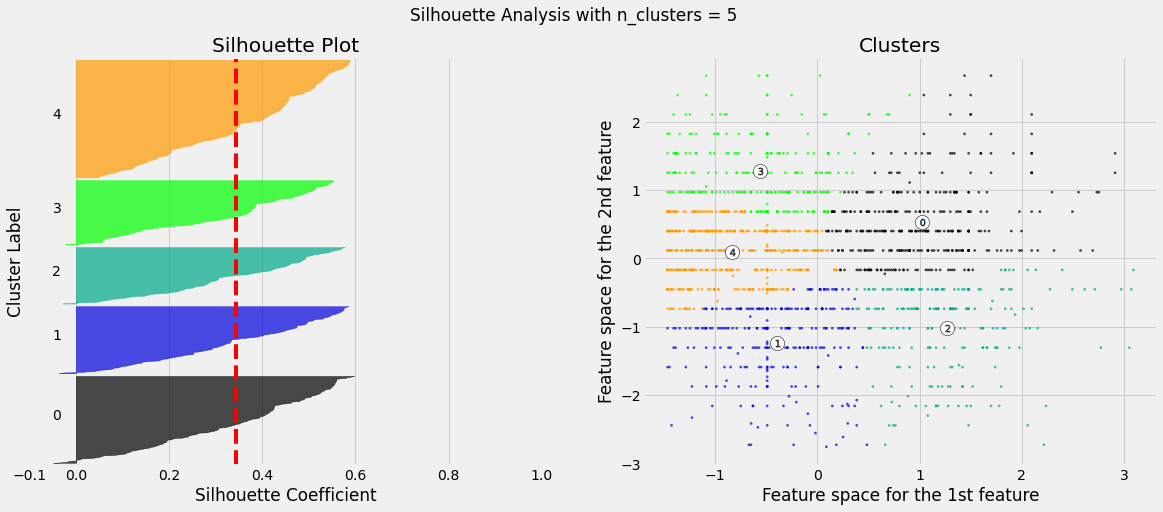

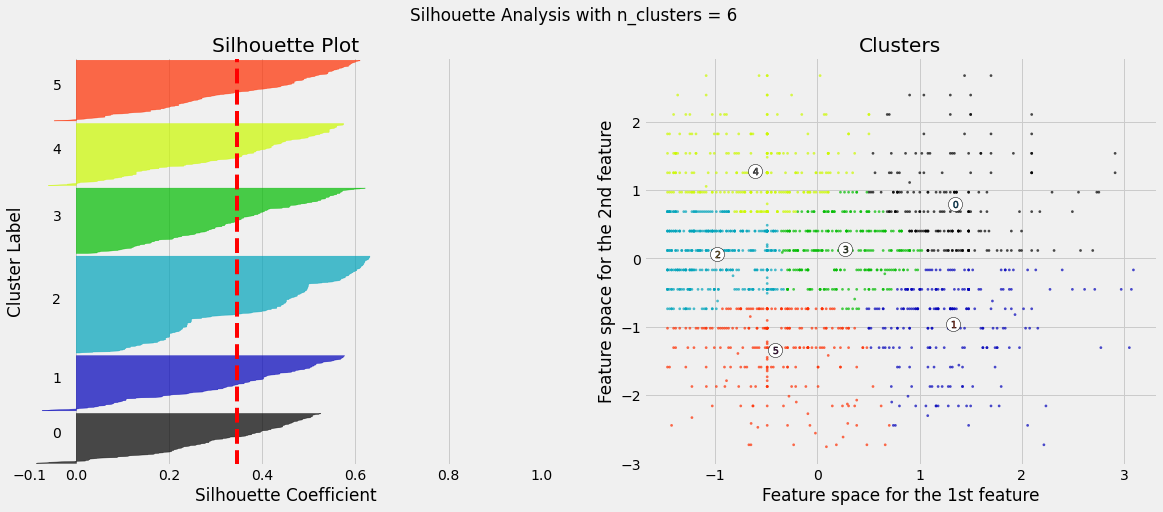

In [17]:
# consider list of K
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # the silhouette coefficient can range from [-1, 1]
    ax1.set_xlim([-0.1, 1])
    # the (n_clusters+1)*10 is to insert blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])

    # initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features)
    
    # the silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(scaled_features, cluster_labels, random_state =10)
    
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  
        
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster Label")

    # the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    # clear the yaxis labels / ticks
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # labeling the clusters
    centers = clusterer.cluster_centers_
    # draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    # set the plot and axes labels
    ax2.set_title("Clusters")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette Analysis with n_clusters = %d" % n_clusters)

# display the plot
plt.show()

**Interpretation:** 
i) The above plot shows the silhouette plots and the clusters formed for each value of K. For K = 3,  the silhouette score is maximum. 

ii) The plot shows that there are outliers (where the silhouette coefficient is less than 0) for K = 2,4,5 and 6 which implies some of the observations are misclassified.

Thus, we can consider the optimal value for the number of clusters as 3.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# we fit k means clustering algorithm with k=3
# number of clusters to form is given by 'n_clusters'
# pass the 'random_state' to consider the same centroid initialization over multiple code runs
# maximum number of iterations of the k-means algorithm for a single run is given by 'max_iter'
# pass the relative tolerance to declare the convergence of algrithm to 'tol'
Kmeans3=KMeans(n_clusters = 3, random_state = 15, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans3.fit(scaled_features)

KMeans(max_iter=200, n_clusters=3, random_state=15, tol=0.001)

**Interpretation:** Here we have clustered the data into 3 groups using K-means clustering.

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# store the lables in 'result'
result = Kmeans3.labels_

# create a dataframe of cluster labels
# pass the column name to the parameter 'cluster'
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs

cluster
0    682
1    401
2    479
dtype: int64

**Interpretation:** The above output shows the size of each cluster. We can see that the 1st cluster contains most of the observations (682 entries) and the other two clusters are almost equal in size.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

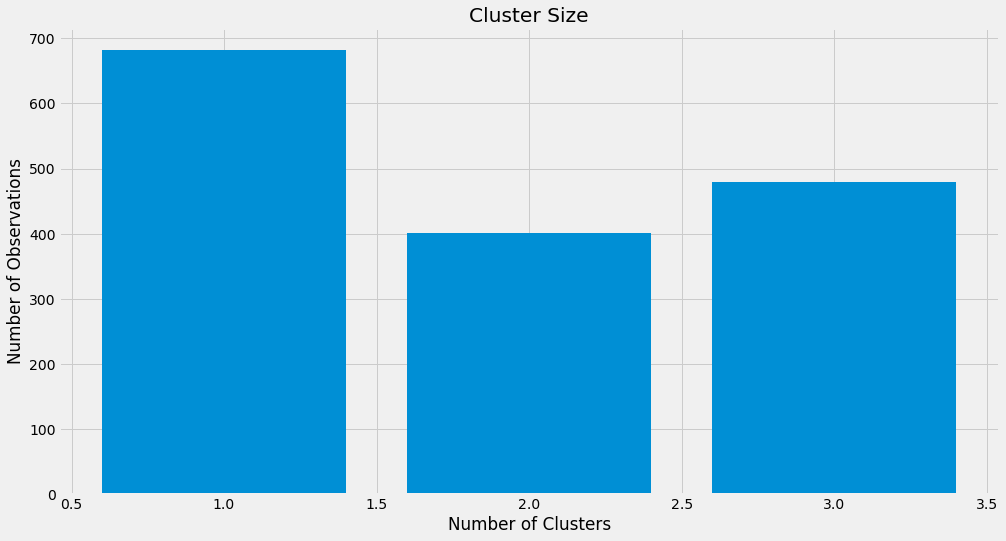

In [20]:
# plot the number of observations in each cluster

# select style of histogram
plt.style.use("fivethirtyeight")

# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot the barplot of number of observations in each cluster
# last number in the range() is exclusive
plt.bar(range(1,4), obs)

# set the plot and axes labels
plt.title('Cluster Size')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Observations')

# to show the barplot
plt.show()

**Interpretation:** The maximum number of observations are in the 1st cluster, whereas the minimum number of observations are in the 2nd cluster. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# 'cluster_centers_' returns the centroids of each cluster
centroids=Kmeans3.cluster_centers_

# create a dataframe of centroids
# pass the column names to 'columns'
centroids=pd.DataFrame(centroids, columns = df_feat.columns)

# print the centroids
centroids

,DepthMeters,Magnitude
0,-0.725877,0.589714
1,-0.156323,-1.214155
2,1.165941,0.183491


**Interpretation:** The above dataframe displays the coordinates of the cluster center.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# store the observations belonging to cluster 1 in d1
d1=df_earthquake[Kmeans3.labels_ == 0]

# print the first five observations
d1.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
3,42.825,-78.239,5000,2.4
5,38.675,-80.820,2300,2.4
8,39.433,-81.362,5000,2.8
9,41.514,-80.333,5000,2.7


In [23]:
# statistical summary of the observations in 1st cluster
d1.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,682.000000,682.000000,682.000000,682.000000
mean,39.069646,-80.180749,3817.302053,2.567229
std,1.998790,2.659989,2497.904389,0.229886
min,37.050000,-82.616800,100.000000,2.200000
25%,37.793800,-81.980150,1500.000000,2.400000
50%,38.058350,-81.500650,3700.000000,2.500000
75%,40.202350,-78.978675,5575.000000,2.700000
max,45.290000,-73.249000,10000.000000,3.300000


**Interpretation:** 
i) There are 682 observations in the 1st cluster which is maximum among all the clusters. 

ii) The magnitude of the earthquake is near about 2.2 to 3.3 in the area where the depth is from 100 meters to 10000 meters. The average latitude of these places is around 39 and longitude is around -80. Here the magnitude of the earthquake is high with fairly low depth; this can cause damage to the nearby area. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# store the observations belonging to cluster 2 in d2
d2=df_earthquake[Kmeans3.labels_ == 1]

# print the first five observations
d2.head()

,Latitude,Longitude,DepthMeters,Magnitude
10,40.859,-74.179,2000,2.1
14,40.011,-74.796,5000,1.9
18,41.035,-73.543,4300,2.1
19,39.509,-77.190,6000,2.2
23,41.075,-74.222,5000,2.0


In [25]:
# statistical summary of the observations in 2nd cluster
d2.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,401.000000,401.000000,401.000000,401.000000
mean,40.533218,-77.884457,6641.596010,1.930898
std,2.414259,3.258211,3728.241535,0.212124
min,37.007700,-82.825500,100.000000,1.390000
25%,38.073300,-81.466200,4200.000000,1.800000
50%,40.323200,-77.191200,6000.000000,2.000000
75%,42.923800,-74.530333,8900.000000,2.100000
max,45.300900,-73.063400,18700.000000,2.230000


**Interpretation:** 
i) There are 401 observations in the 2nd cluster which is minimum among all the clusters.

ii) The magnitude of the earthquake is about 1.39 to 2.23 in the area where the depth is from 100 meters to 18700 meters. The average latitude of these places is around 40.5 and the longitude is around -78. Here the magnitude of the earthquake is not severe but can be recorded by a seismograph. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# store the observations belonging to cluster 3 in d3
d3=df_earthquake[Kmeans3.labels_ == 2]

# print the first five observations
d3.head()

,Latitude,Longitude,DepthMeters,Magnitude
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
6,38.818,-80.430,17000,2.5
7,38.792,-80.398,10700,2.5
12,44.964,-74.588,17000,2.4


In [27]:
# statistical summary of the observations in 3rd cluster
d3.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,479.000000,479.000000,479.000000,479.000000
mean,40.297913,-78.663553,13327.828810,2.420543
std,2.537532,3.245434,2852.146935,0.270252
min,37.179900,-82.548100,8300.000000,1.800000
25%,38.034950,-81.583950,11300.000000,2.200000
50%,39.683000,-80.494000,13100.000000,2.400000
75%,42.570500,-74.980300,14900.000000,2.600000
max,45.296000,-73.190000,23000.000000,3.300000


**Interpretation:** 
i) There are 479 observations in the 3rd cluster.

ii) The magnitude of the earthquake is about 1.8 to 3.3 in the area where the depth is from 8300 meters to 23000 meters. The depth of the earthquakes in this cluster is maximum. The average latitude of these places is around 40 and longitude is around -79. Here the magnitude of the earthquake is medium and this can cause minor damage.